In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('milk.csv') # Import data from csv
 
# The first column of the Data Frame contains the labels
lab = data.values[:,1].astype('uint8') 
 
# Read the features (scans) and transform data from reflectance to absorbance
feat = np.log(1.0/(data.values[:,2:]).astype('float32'))
 
# Calculate first derivative applying a Savitzky-Golay filter
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

In [6]:
data.head()

,Unnamed: 0,labels,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,601,602
0,1/02/2018,1,2.397526,2.394200,2.388952,2.381282,2.371906,2.360940,2.349092,2.336749,...,0.109473,0.111015,0.113123,0.115745,0.118939,0.122773,0.127250,0.132313,0.137997,0.144151
1,1/02/2018.1,1,2.399526,2.396723,2.391678,2.383280,2.372825,2.361160,2.348541,2.336346,...,0.108937,0.110649,0.112845,0.115586,0.118847,0.122642,0.127013,0.131837,0.137191,0.143028
2,1/02/2018.2,1,2.396475,2.393600,2.388446,2.380985,2.371319,2.359930,2.348114,2.336348,...,0.108358,0.110062,0.112391,0.115298,0.118736,0.122774,0.127359,0.132500,0.138217,0.144524
3,1/02/2018.3,1,2.406880,2.404243,2.399203,2.391142,2.380536,2.368569,2.356339,2.344046,...,0.110105,0.111836,0.114057,0.116744,0.119888,0.123524,0.127728,0.132561,0.138030,0.144085
4,1/02/2018.4,1,2.409883,2.407017,2.401310,2.392669,2.381365,2.368603,2.355518,2.342792,...,0.110129,0.111469,0.113277,0.115589,0.118503,0.122092,0.126346,0.131227,0.136840,0.143176


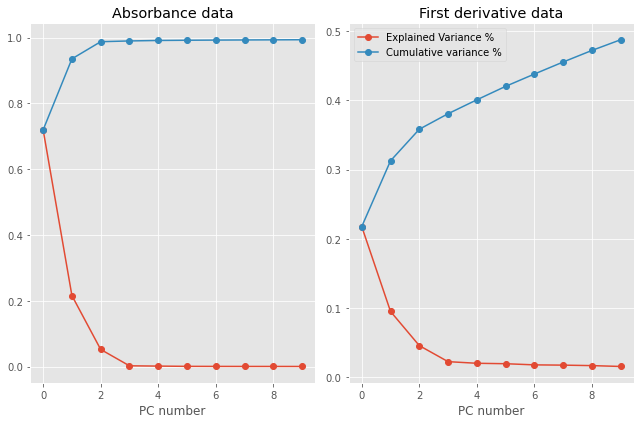

In [3]:
# Initialise
skpca1 = sk_pca(n_components=10)
skpca2 = sk_pca(n_components=10)
 
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)
 
# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = skpca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

In [4]:
skpca2 = sk_pca(n_components=4)
 
# Transform on the scaled features
Xt2 = skpca2.fit_transform(nfeat2)

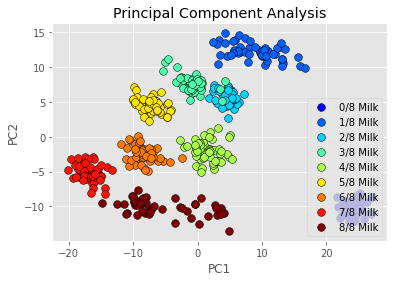

In [5]:

# Define the labels for the plot legend
labplot = ["0/8 Milk","1/8 Milk","2/8 Milk", "3/8 Milk", \
"4/8 Milk", "5/8 Milk","6/8 Milk","7/8 Milk", "8/8 Milk"]
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='lower right')
    plt.title('Principal Component Analysis')
    plt.show()